In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit as sigmoid

In [2]:
# Loading data stored in numpy format
Data = np.load("Handwritten_data.npz")
Data.files

['labels', 'data']

In [3]:
y = Data['labels']
m = y.size 
X = Data['data']
# Adding the columns of one for the intercept 
X = np.c_[np.ones(m),X]

num_labels = np.unique(y).size
X.shape,num_labels

((5000, 401), 10)

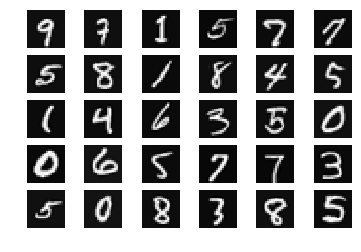

In [4]:
# Plotting 30 random examples from X
indices = np.random.randint(0,m,30)

fig=plt.figure()
for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.show()

In [5]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = y.size
    h = sigmoid(X.dot(t))
    J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))                         
    grad = (1.0/m)*((X.T).dot(h-y))
    reg_term = np.r_[0,((lamb/float(m)) * t[1:])]
    grad = grad+reg_term
  
    return J,grad  

In [6]:
# Computing the Cost and Gradient on sample values
theta_t = np.array([-2,-1,1,2])
X_t = np.hstack((np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0))
y_t = np.array([1,0,1,0,1])
lamb_t = 3
J,G = costFunction(theta_t,X_t,y_t,lamb_t)
print "Cost: ", J
print "Gradient: "
print G

Cost:  2.53481939611
Gradient: 
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [7]:
# Optimizing the parameters theta using scipy.optimize 
def find_min(init_theta,X,y,lamb):
    res = minimize(costFunction,init_theta,args=(X,y,lamb),method = 'CG',jac = True
               ,options={'maxiter':150,'disp':True})  
    return res.x

In [8]:
# oneVsAll trains multiple logistic regression classifiers and returns all
# the classifiers in a matrix theta_mat, where the i-th row of theta_mat 
# corresponds to the classifier for label i
def oneVsAll(X,y,num_labels,lamb):
    m,n = X.shape
    theta_mat = np.empty([num_labels,n])
    for i in range(num_labels):
        print "Class: %s" % i 
        y_temp = (y == i).astype(int)
        init_theta = np.random.rand(n)
        init_theta = find_min(init_theta,X,y_temp,lamb)
        theta_mat[i,:] = init_theta
    return theta_mat
        

In [9]:
# Training One-vs-All Logistic Regression
lamb = 0.1
theta_mat = oneVsAll(X,y,num_labels,lamb)

Class: 0


/home/azfar305/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/azfar305/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Optimization terminated successfully.
         Current function value: 0.008569
         Iterations: 138
         Function evaluations: 545
         Gradient evaluations: 545
Class: 1
Optimization terminated successfully.
         Current function value: 0.013116
         Iterations: 143
         Function evaluations: 567
         Gradient evaluations: 567
Class: 2
         Current function value: 0.051055
         Iterations: 150
         Function evaluations: 475
         Gradient evaluations: 475
Class: 3
         Current function value: 0.057909
         Iterations: 150
         Function evaluations: 448
         Gradient evaluations: 448
Class: 4
         Current function value: 0.033132
         Iterations: 150
         Function evaluations: 513
         Gradient evaluations: 513
Class: 5
         Current function value: 0.054718
         Iterations: 150
         Function evaluations: 462
         Gradient evaluations: 462
Class: 6
         Current function value: 0.018261
      

In [10]:
# Predicting labels 
def predictOneVsAll(X,theta_mat):
    
    temp = sigmoid(X.dot(theta_mat.T))
    label = np.argmax(temp,axis = 1)
    return label

In [11]:
# Predicting Accuracy on the training set
y_predict = predictOneVsAll(X,theta_mat)
accuracy = np.mean(y == y_predict) *100
print "Accuracy on the Training Set %s %%" % round(accuracy,2)
print "Logistic Regression made errors in predicting %s samples out of 5000 in the training set " % np.count_nonzero(y != y_predict)

Accuracy on the Training Set 96.32 %
Logistic Regression made errors in predicting 184 samples out of 5000 in the training set 


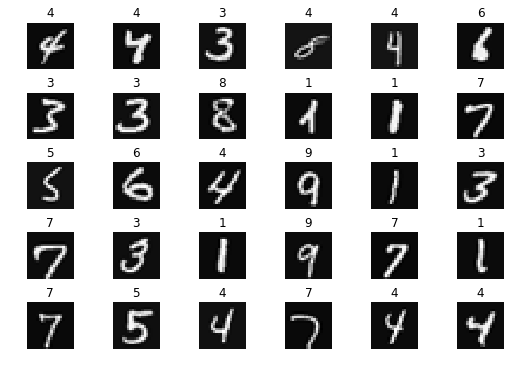

In [13]:
# Plotting 30 random examples from X with their predicted labels
indices = np.random.randint(0,m,30)

fig = plt.figure(figsize = (9,6))

for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)    
    plt.title(y_predict[indices[i]])
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.subplots_adjust(hspace = 0.5)    
plt.show()